**Import libraries**

In [1]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm
from typing import List, Tuple

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Q2.1

**We will define the ODE SIR model.**

Use `model_ode` and `solve_ode` to generate the plots below.

In [3]:
def model_ode(times, init: List[float], params: List[float]):
    [S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax] = init
    [beta, gamma, rho] = params

    dS_unvaxdt = -beta * S_unvax * (I_unvax+I_vax) 
    dI_unvaxdt = beta * S_unvax * (I_unvax+I_vax)  - gamma * I_unvax
    dR_unvaxdt = gamma * I_unvax
    dS_vaxdt = -beta * (1-rho) * S_vax * (I_unvax+I_vax)
    dI_vaxdt = beta * (1-rho) * S_vax * (I_unvax+I_vax)  - gamma *(1-rho) * I_vax
    dR_vaxdt = gamma * (1-rho) * I_vax
    
    return [dS_vaxdt, dS_unvaxdt, dI_vaxdt, dI_unvaxdt, dR_vaxdt, dR_unvaxdt]
    
def solve_ode(init, params, t_max, t_step):
  
    times = np.arange(0, t_max, t_step)
    sol = solve_ivp(
        lambda t, y: model_ode(t, y, params), [0, t_max], init, t_eval=times
    )
    
    return sol.t, sol.y

**Run the model with initial values**

In [4]:
beta = 0.1 #float(input("Enter your value for beta: "))
gamma = 0.01 #float(input("Enter your value for gama: "))
rho = 0.3 # float(input("Enter your value for rho: "))
S10 = 0.45 # float(input("Enter your value for S0 : "))
I10 = 0.05 #float(input("Enter your value for I0 : "))
R10 = 0.0 #float(input("Enter your value for R0 : "))
S20 = 0.45 #float(input("Enter your value for S0 : "))
I20 = 0.05 #float(input("Enter your value for I0 : "))
R20 = 0.0 #float(input("Enter your value for R0 : "))
max_time = 200 #int(input("Enter your value for max_time: "))

init = [S20,S10,I20,I10,R20,R10]
params = [beta,gamma,rho]
t_max = max_time
t_step = 1

sol = solve_ode(init,params,t_max,t_step)

In [5]:
R2 = sol[1][4]
R1 = sol[1][5]
R2[max_time-1]+R1[max_time-1]

0.7463228199286038

**R(T) = 0.7463228199286038**

<function matplotlib.pyplot.show(*args, **kw)>

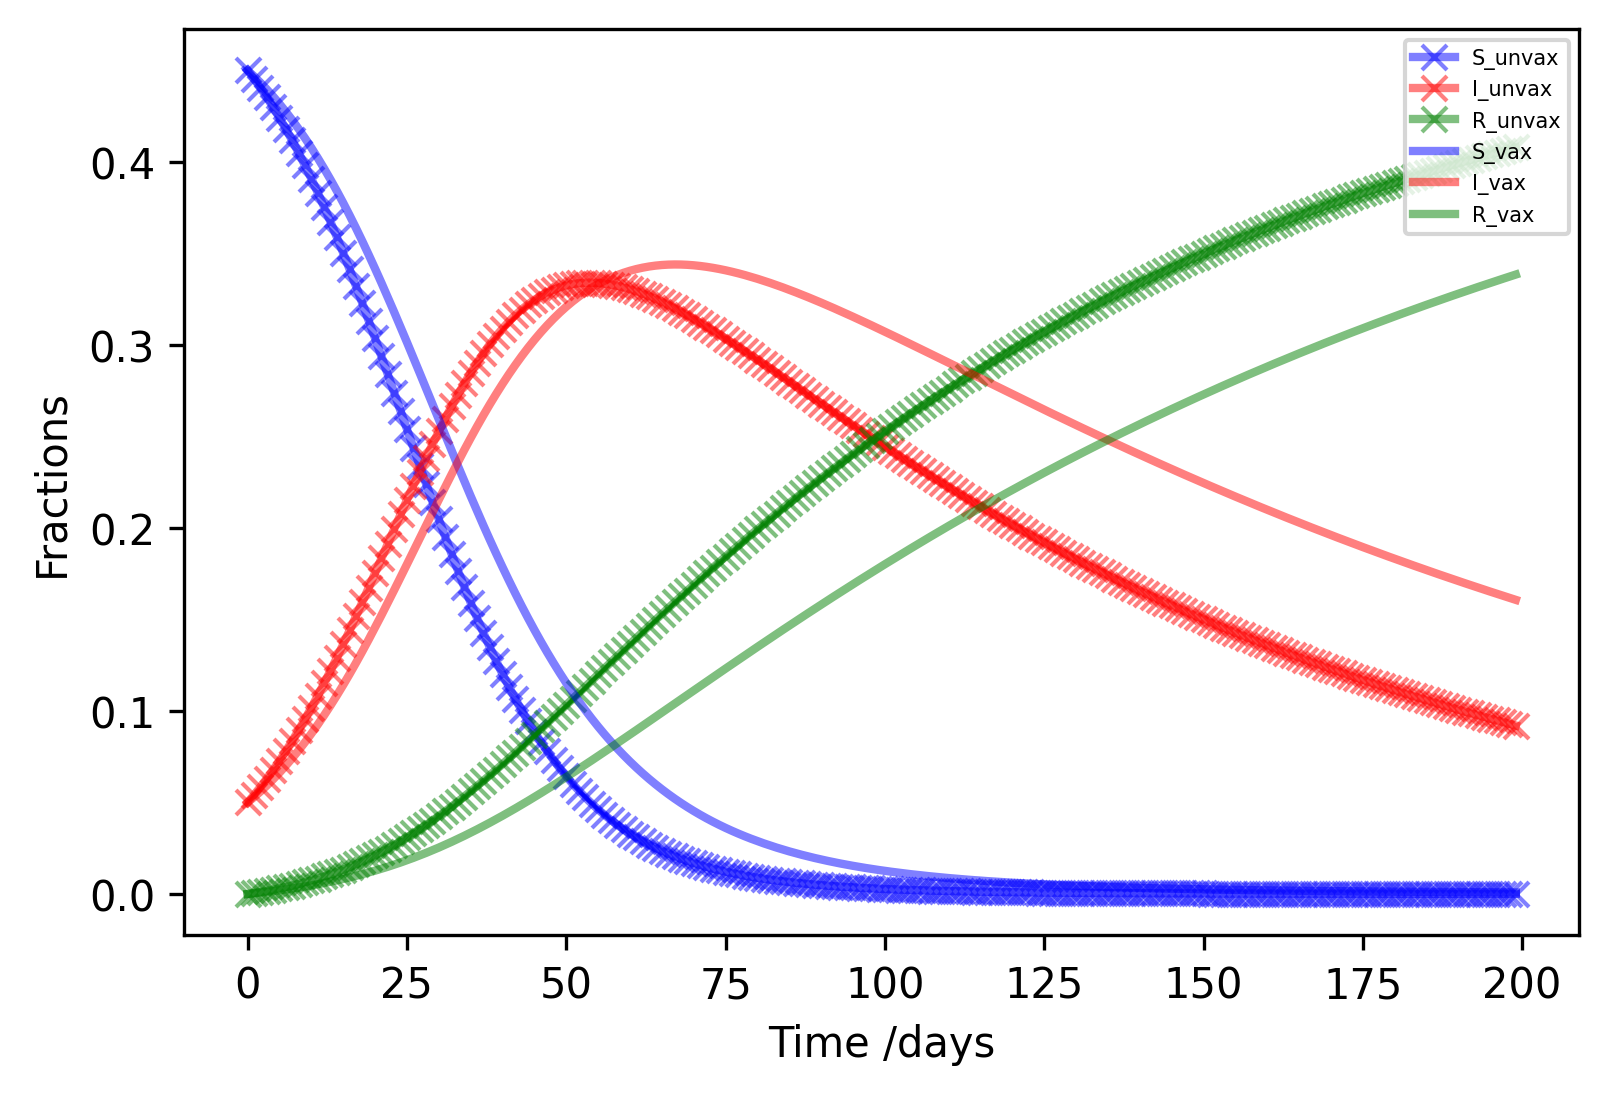

In [7]:
t = sol[0]
S2 = sol[1][0]
S1 = sol[1][1]
I2 = sol[1][2]
I1 = sol[1][3]
R2 = sol[1][4]
R1 = sol[1][5]

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')

# Creating a new axes with specified dimensions and some kwargs
#plt.axes((left, bottom, width, height), facecolor='w')
ax = fig.add_subplot(111, facecolor='w', axisbelow=True)
ax.plot(t, S1, 'b', alpha=0.5, lw=2, label='S_unvax', marker="x")
ax.plot(t, I1, 'r', alpha=0.5, lw=2, label='I_unvax', marker="x")
ax.plot(t, R1, 'g', alpha=0.5, lw=2, label='R_unvax', marker="x")
ax.plot(t, S2, 'b', alpha=0.5, lw=2, label='S_vax')
ax.plot(t, I2, 'r', alpha=0.5, lw=2, label='I_vax')
ax.plot(t, R2, 'g', alpha=0.5, lw=2, label='R_vax')
ax.set_xlabel('Time /days')
ax.set_ylabel('Fractions')


plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5})
plt.show

**Changing vaccination rate to 10%**

In [8]:
beta = 0.1 #float(input("Enter your value for beta: "))
gamma = 0.01 #float(input("Enter your value for gama: "))
rho = 0.3 # float(input("Enter your value for rho: "))
S10 = 0.81 # float(input("Enter your value for S0 : "))
I10 = 0.09 #float(input("Enter your value for I0 : "))
R10 = 0.0 #float(input("Enter your value for R0 : "))
S20 = 0.09 #float(input("Enter your value for S0 : "))
I20 = 0.01 #float(input("Enter your value for I0 : "))
R20 = 0.0 #float(input("Enter your value for R0 : "))
max_time = 200 #int(input("Enter your value for max_time: "))

init = [S20,S10,I20,I10,R20,R10]
params = [beta,gamma,rho]
t_max = max_time
t_step = 1

sol = solve_ode(init,params,t_max,t_step)

In [9]:
R2 = sol[1][4]
R1 = sol[1][5]
R2[max_time-1]+R1[max_time-1]

0.8047133333921389

**The final R values for 50% and 10% vaccination**

*  **R1_50% = 0.7463228199286038**
*   **R1_10% = 0.8047133333921389**



# Q2.2
**We will implement a stochastic version of the SIR model we defined above.**

In [10]:
def stochastic_model_oracle(init: List[float]):
    """
    Define the stochastic model here
    Args:
        init: array of initial fractions [S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax]
    Returns:
        r_final: final fraction of recovered individuals
    """
    
    S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax = init
    # CODE HERE
    # First sample the parameters from distributions
    
    # Then solve the ode using code from Q2.1

    # Return final R(T)    

    beta = np.random.uniform(0.05,0.15)
    gamma = np.random.uniform(0.005,0.015)
    rho = np.random.uniform(0.1,0.3)
    
    max_time = 200#int(input("Enter your value for max_time: "))
    t = np.linspace(0, max_time, max_time)
    params = [beta,gamma,rho]
    t_max = max_time
    t_step = 1

    sol = solve_ode(init,params,t_max,t_step)

    R2 = sol[1][4]
    R1 = sol[1][5]  

    R = (R1[max_time-1]+R2[max_time-1])

    return R

In [13]:
R = []
S_in = 0.9
I_in = 0.1
k_v = [0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0]
for j in range(1000): 
  R_k = []
  for k in k_v:

    S10 = S_in*(1-k) # float(input("Enter your value for S0 : "))
    I10 = I_in*(1-k)# float(input("Enter your value for I0 : "))
    R10 = 0.0 #float(input("Enter your value for R0 : "))
    S20 = S_in*(k) #float(input("Enter your value for S0 : "))
    I20 = I_in*(k) #float(input("Enter your value for I0 : "))
    R20 = 0.0 #float(input("Enter your value for R0 : "))
    init = [S20,S10,I20,I10,R20,R10]

    R_k.append(stochastic_model_oracle(init))
  R.append(R_k)
np.asarray(R).mean(axis=0)

array([0.79067189, 0.7831508 , 0.76960882, 0.7578223 , 0.74949315,
       0.7417532 , 0.73121215, 0.72170956, 0.71385932, 0.70342772,
       0.6966116 ])

**Mean value of R(T) for each k after 1000 iterations:**

**Rarray** = array([0.79067189, 0.7831508 , 0.76960882, 0.7578223 , 0.74949315,
       0.7417532 , 0.73121215, 0.72170956, 0.71385932, 0.70342772,
       0.6966116 ])

In [15]:
R_k_200 = np.asarray(R).mean(axis=0)

**For different values of $k$ we will compute $R(T)$.**

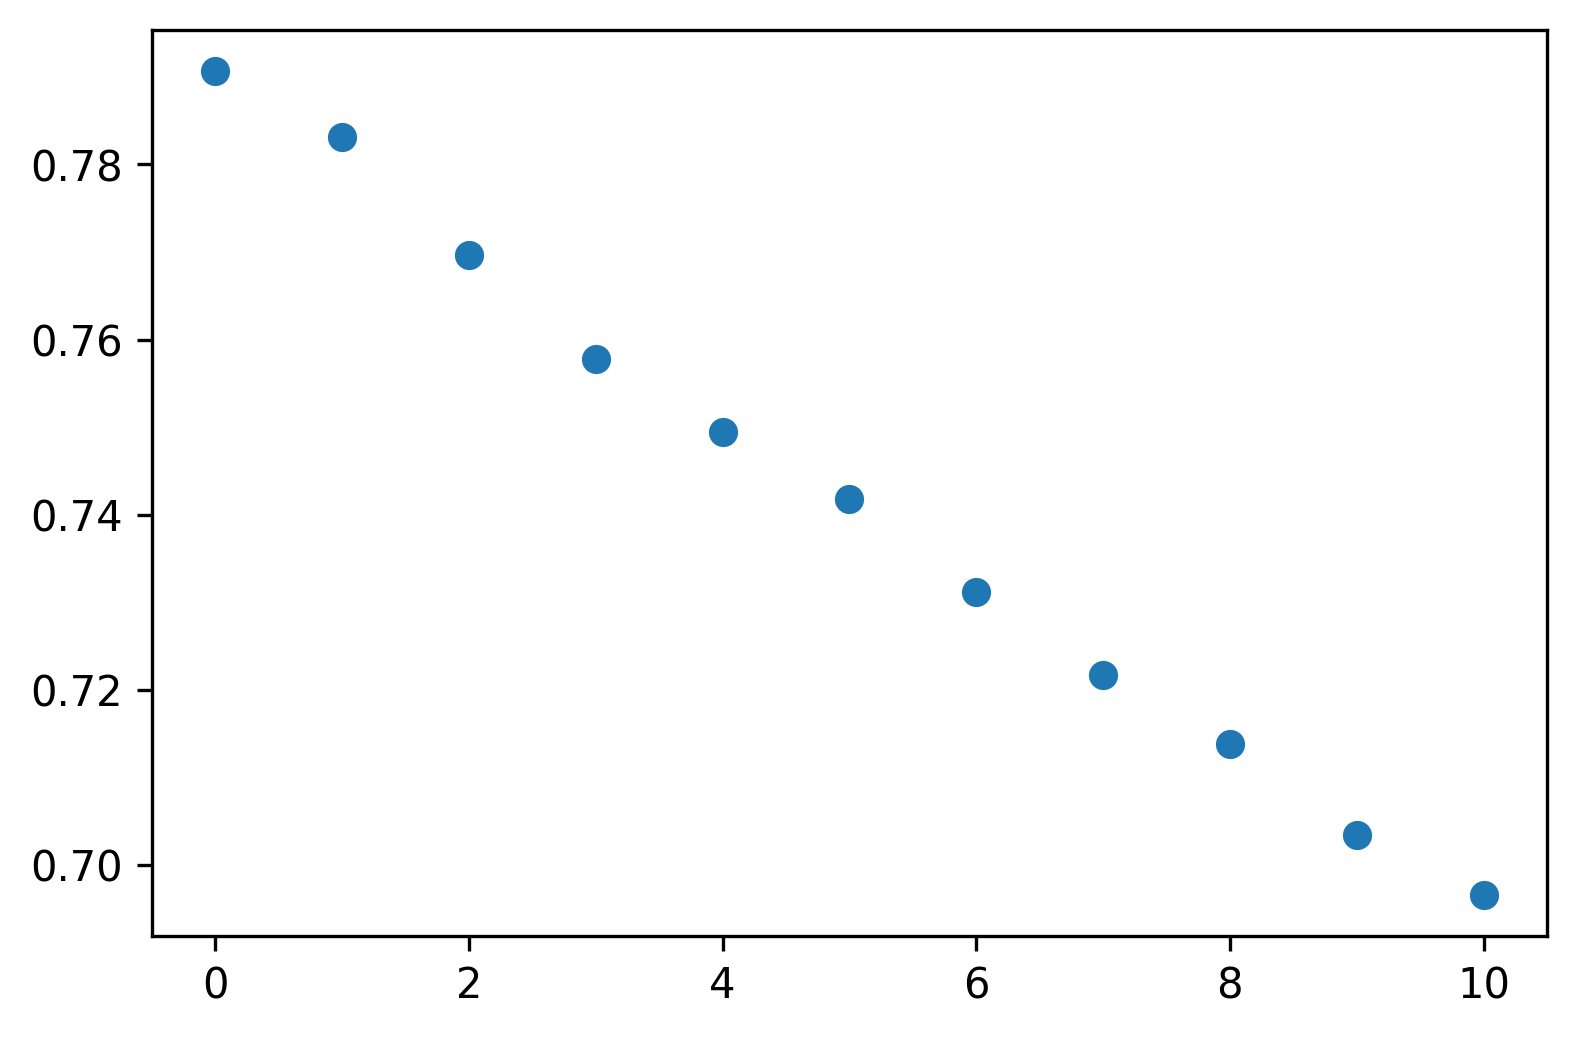

In [16]:
plt.scatter(range(11),R_k_200)

# Q2.3
We will first implement the cost function using `stochastic_model_oracle`.

In [20]:
def cost_function(arm_no: float):
    """
    Return the cost function for the arm by running one simulation of stochastic_model_oracle
    Args:
        arm_no: arm number from 0-9
    Returns:
        cost: cost of running the arm

    """
    #assert arm_no in list(range(10))
    # CODE HERE
    # Compute initial fractions based on the arm
    S_in = 0.9
    I_in = 0.1
    k = arm_no/10
    S10 = S_in*(1-k) # float(input("Enter your value for S0 : "))
    I10 = I_in*(1-k)# float(input("Enter your value for I0 : "))
    R10 = 0.0 #float(input("Enter your value for R0 : "))
    S20 = S_in*(k) #float(input("Enter your value for S0 : "))
    I20 = I_in*(k) #float(input("Enter your value for I0 : "))
    R20 = 0.0 #float(input("Enter your value for R0 : "))
    init = [S20,S10,I20,I10,R20,R10]
    
    R = stochastic_model_oracle(init)
    # Compute and return the reward
    cost_k = 8*(S20+I20) + 10*R
    return cost_k


# Q2.4
We will now implement the MAB algorithm.
We have provided the basic skeleton og the algorithm in `run_bandit` function.
You just need to implement the strategies and perform the experiments multiple times to get the average costs.


In [22]:
import random
from random import randrange

In [23]:
def epsilon_greedy(epsilon: float, V: np.ndarray):
    # CODE HERE
    a = np.random.random(1)[0]
    if a<epsilon:
      arm = randrange(10)
    else:
      arm = np.argmin(V, axis = 0)

    return arm

def softmax(temperature: float, V: np.ndarray) -> int:
    # CODE HERE
    tau = 1
    V_e =[]
    for k in range(10):
      e_x = np.exp(-V[k]/tau)
      V_e.append(e_x)

    V_e = V_e / sum(V_e)
    arm = np.argmax(V_e)
    randomList = random.choices(range(10), weights=V_e, k =1)[0]

    return randomList # only difference

def run_bandit(policy, params, max_time):

    """
    Run the bandit algorithm
    Args:
        policy: bandit algorithm ??
        params: parameters for the bandit algorithm
        max_time: number of time-steps
    Returns:
        cost: cost at each time-step
        V: value estimate of each arm at each time-step
    """
    cost = np.zeros(max_time)
    V = np.zeros(10)
    N = np.zeros(10)
    err = np.zeros(10)
    for t in range(max_time):
        arm = policy(*params, V) 
        cost[t] = cost_function(arm)
        N[arm] += 1
        V[arm] += (cost[t] - V[arm]) / N[arm]
        err[arm] = (cost[t] - V[arm])
    return cost, V,err

costi = []
erri = []
V_v = []

for n in range(1000):  
  cost, V,err =  run_bandit(epsilon_greedy, [0.1], 100)
  costi.append(cost)
  erri.append(err)
  V_v.append(V)

costi_s = []
erri_s = []
V_v_s = []

for n in range(1000):  
  cost, V,err =  run_bandit(softmax, [1.0], 100)
  costi_s.append(cost)
  erri_s.append(err)
  V_v_s.append(V)

<function matplotlib.pyplot.show(*args, **kw)>

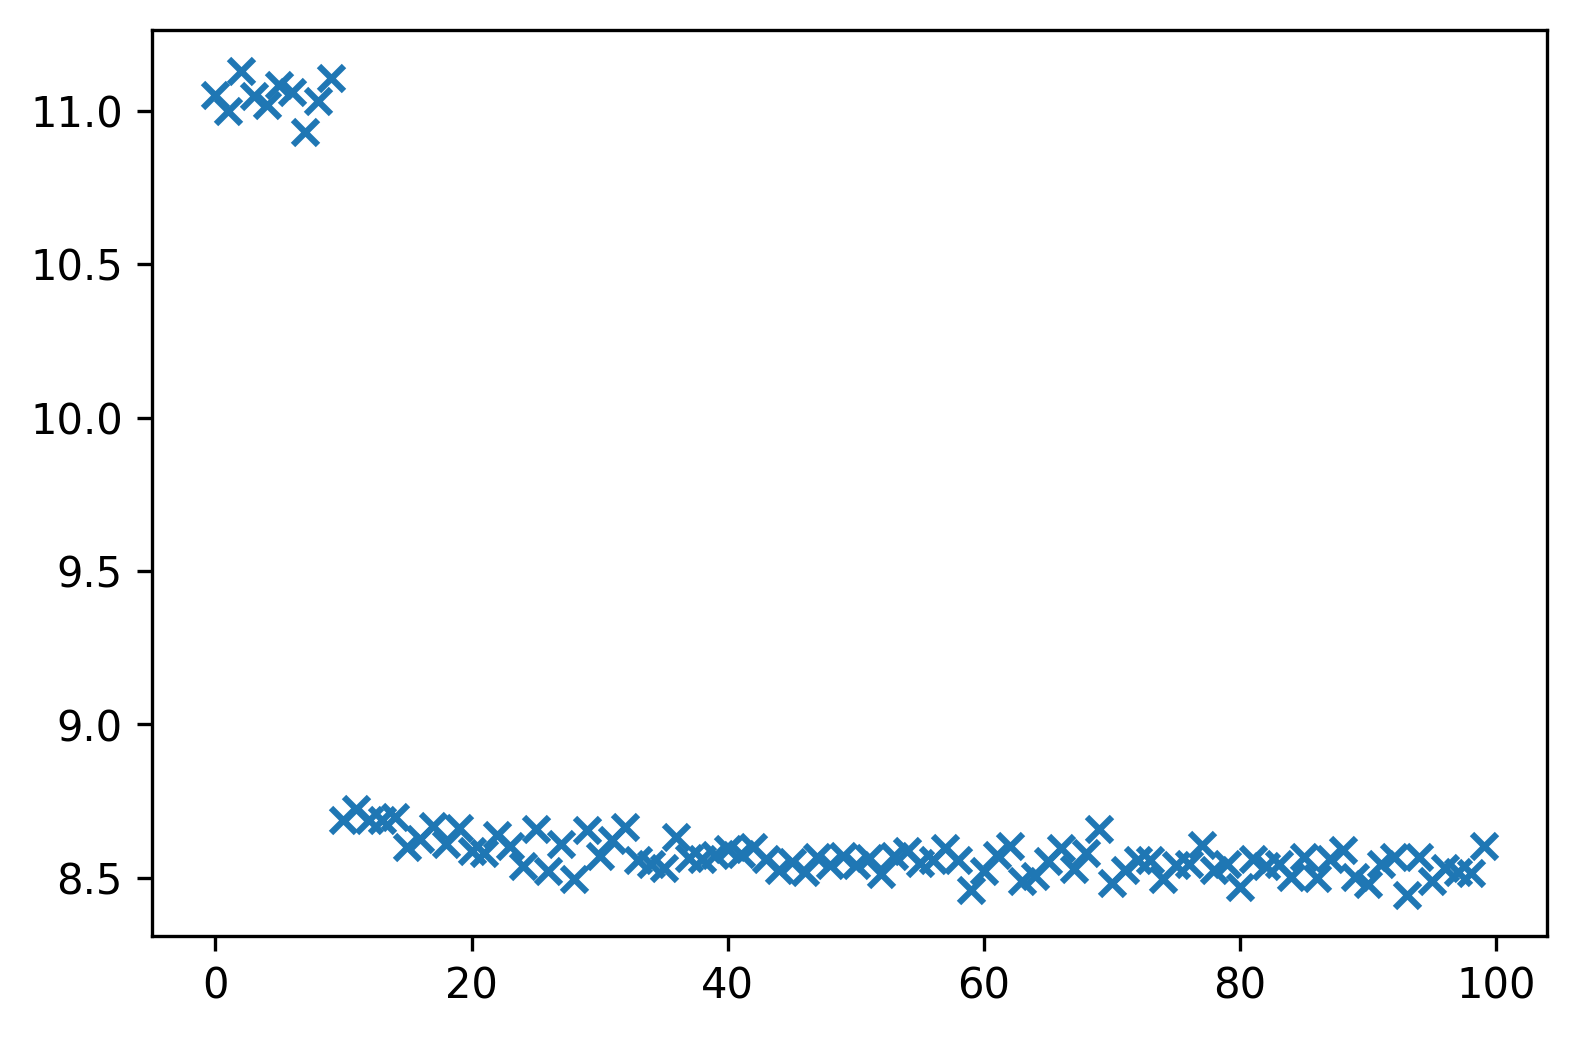

In [24]:
xax = range(100)
plt.scatter(xax, np.mean(costi_s,axis=0) ,marker="x")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

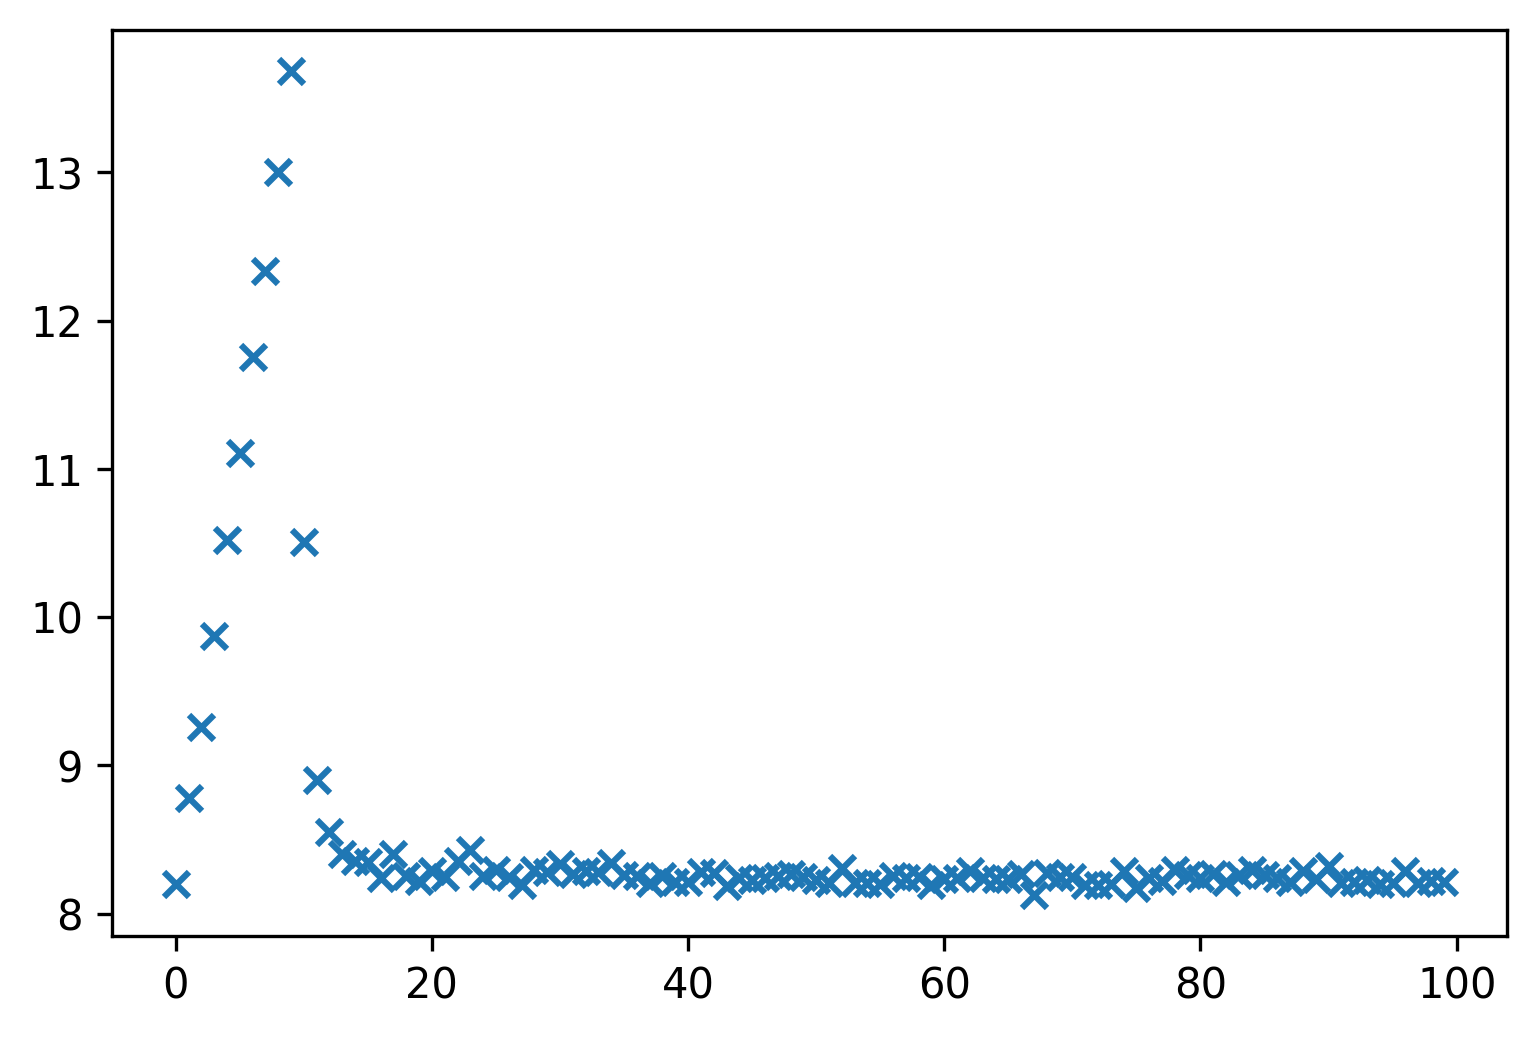

In [25]:
xax_2 = range(100)

plt.scatter(xax_2, np.mean(costi,axis=0), marker="x")
plt.show

# Q 2.5
Now plot the avergae $V(k)$ for all arms for both strategies.

**Cost after averaging 1000 iterations**

In [29]:
def cost_function(arm_no: float):
    """
    Return the cost function for the arm by running one simulation of stochastic_model_oracle
    Args:
        arm_no: arm number from 0-9
    Returns:
        cost: cost of running the arm

    """
    #assert arm_no in list(range(10))
    # CODE HERE
    # Compute initial fractions based on the arm
    S_in = 0.9
    I_in = 0.1
    k = arm_no/10
    S10 = S_in*(1-k) # float(input("Enter your value for S0 : "))
    I10 = I_in*(1-k)# float(input("Enter your value for I0 : "))
    R10 = 0.0 #float(input("Enter your value for R0 : "))
    S20 = S_in*(k) #float(input("Enter your value for S0 : "))
    I20 = I_in*(k) #float(input("Enter your value for I0 : "))
    R20 = 0.0 #float(input("Enter your value for R0 : "))
    init = [S20,S10,I20,I10,R20,R10]
    
    R = R_k_200[arm_no]
    # Compute and return the reward
    cost_k = 8*(S20+I20) + 10*R
    return cost_k


In [30]:
Cost=[]
S_in = 0.9
I_in = 0.1
for l in range(10):
  Cost_k = cost_function(l) #8*(S20+I20) + 10*xx_200[l]
  Cost.append(Cost_k)

In [34]:
vax = range(10)

**Compariosn with greedy, softmax and oracle(after 1000 iters)**

<function matplotlib.pyplot.show(*args, **kw)>

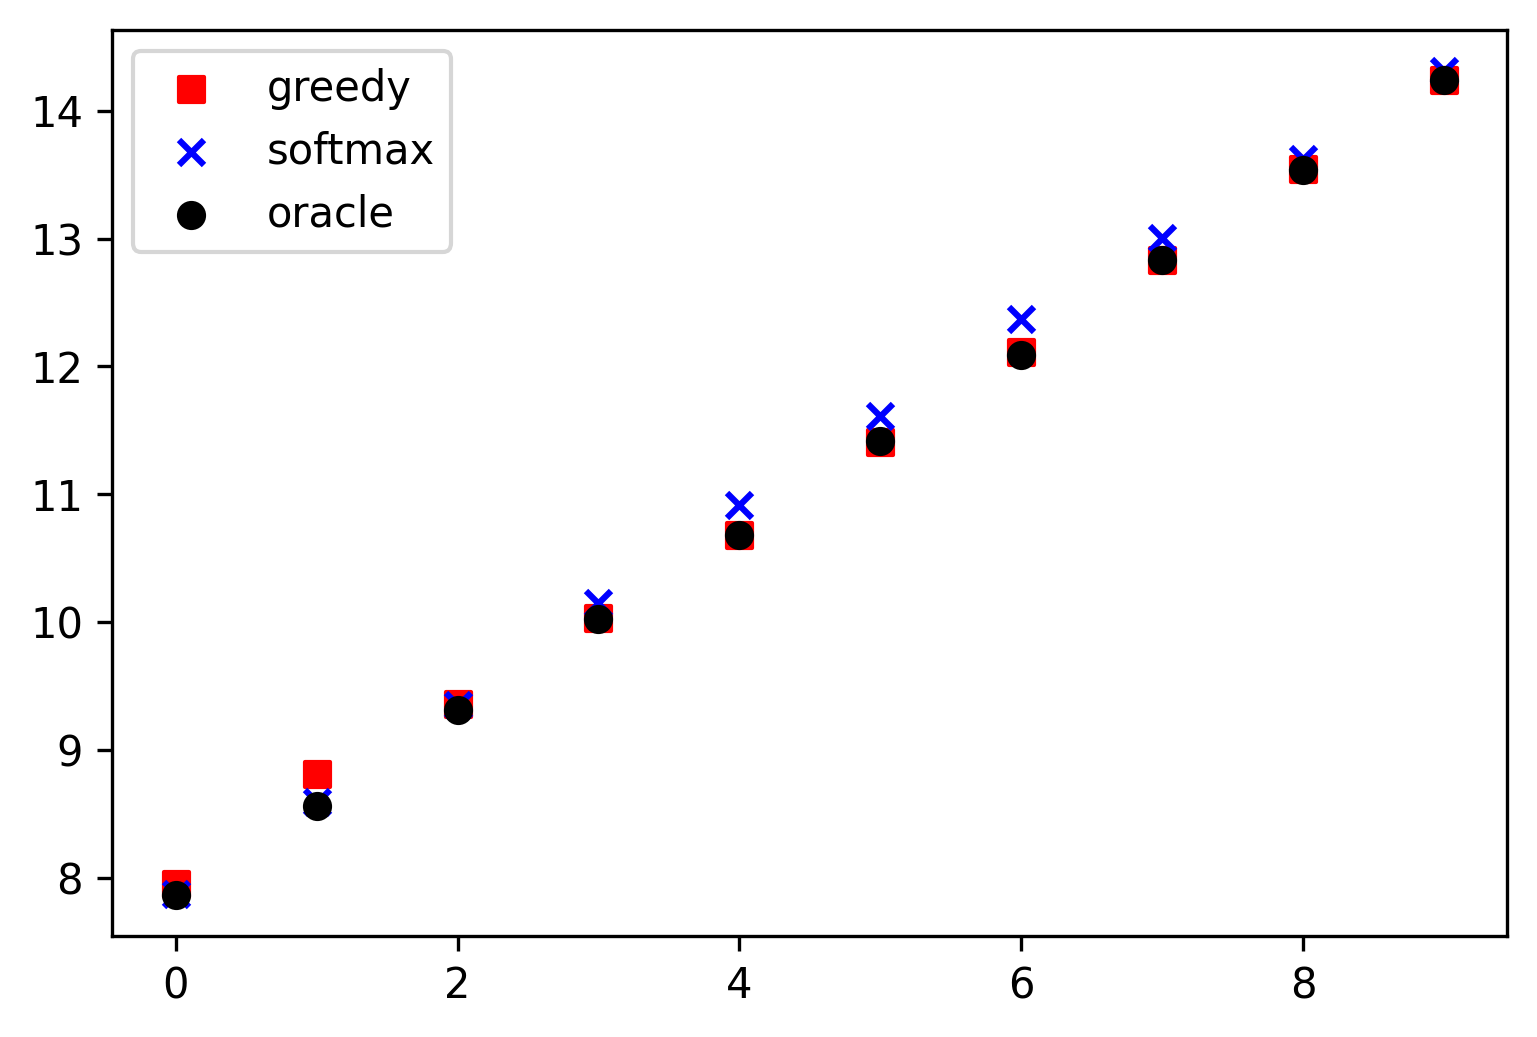

In [57]:
plt.scatter(vax, np.mean(V_v,axis=0),marker="s",color='r',label='greedy')
plt.scatter(vax, np.mean(V_v_s,axis=0),marker="x",color='blue',label='softmax')
plt.scatter(vax, Cost,marker="o",color = 'k',label='oracle')
plt.legend()
plt.show